# Inspect the Data Set

In this project the data set from [FER-2013 Faces Database](http://www.socsci.ru.nl:8180/RaFD2/RaFD?p=main) is used. This set of 28,709 pictures contains people displaying 7 emotional expressions (angry, disgusted, fearful, happy, sad, surprised and neutral).
The data set is available at [Kaggle](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data). Download `fer2013.tar.gz` and decompress `fer2013.csv` in the `./data` folder.

The data is in CSV format and have to be transformed with `csv_to_numpy.py` script, it generates the image(`data_image.npy`) and label(`data_lable.npy`) data in the `data` folder.

The python class `DatasetLoader` in dataset_loader.py can be used to load that data into the memory, split it into train and test data (via sklearn pythen module). After that the image data and label data for training and testing is via python properties accessible. 

In [2]:
import numpy as np
from dataset_loader import DatasetLoader

ds = DatasetLoader()
ds.load_from_save()
print('Training Image Set: ', ds._images.shape)
print('Training Label Set: ', ds._labels.shape)
print('Test Image Set: ', ds._images_test.shape)
print('Test Label Set: ', ds._labels_test.shape)

Training Image Set:  (28709, 48, 48, 1)
Training Label Set:  (28709, 7)
Test Image Set:  (7178, 48, 48, 1)
Test Label Set:  (7178, 7)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from constants import EMOTIONS

%matplotlib inline

def plot20images(images, labels):
    
    images = images[0:40,]
    labels = labels[0:40,]
    
    # reduce shape to [n, image_size_x, image_size_x]
    images = np.squeeze(images)
    # reduce the one hot encoding to the actual class number
    labels = np.argmax(labels,axis=1)


    # define the figure size and grid layout properties
    figsize = (25, 10)
    cols = 10
    gs = gridspec.GridSpec(len(images) // cols + 1, cols)
    gs.update(hspace=0.4)


    # plot everything
    fig1 = plt.figure(num=1, figsize=figsize)
    ax = []
    for i, _ in enumerate(images):
        row = (i // cols)
        col = i % cols    
        ax.append(fig1.add_subplot(gs[row, col]))
        ax[-1].set_title('{}: {}'.format(labels[i],EMOTIONS[labels[i]]))
        ax[-1].imshow(images[i,], cmap='gray')
        ax[-1].axis('off') 
        #plt.axis('off')
    plt.show()

## Plot 20 Train Images

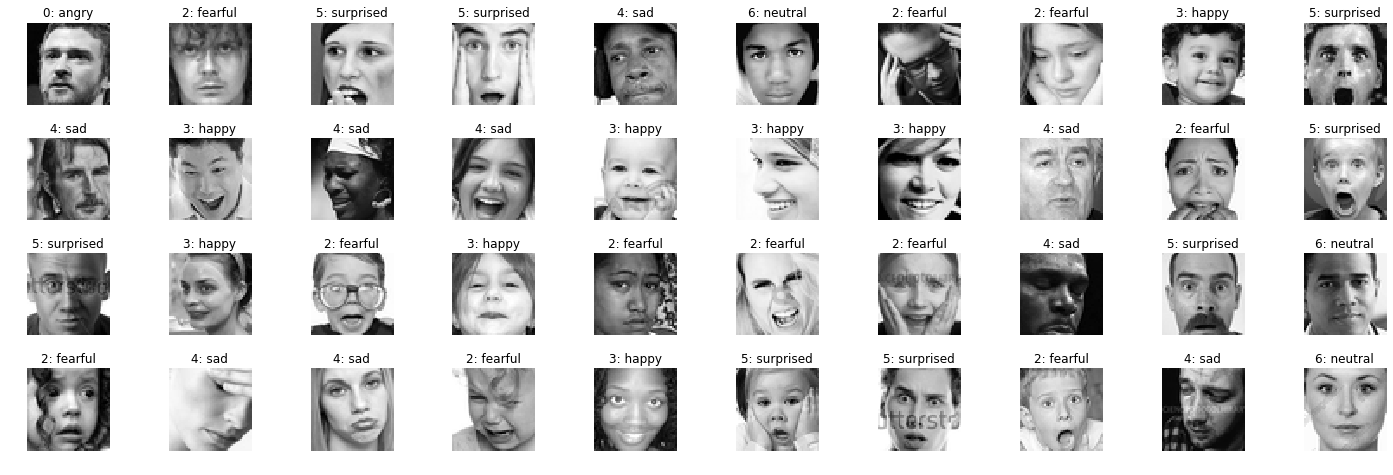

In [4]:
train_x = ds._images
train_y = ds._labels
plot20images(train_x[20:], train_y[20:])

## Plot 20 Test Images

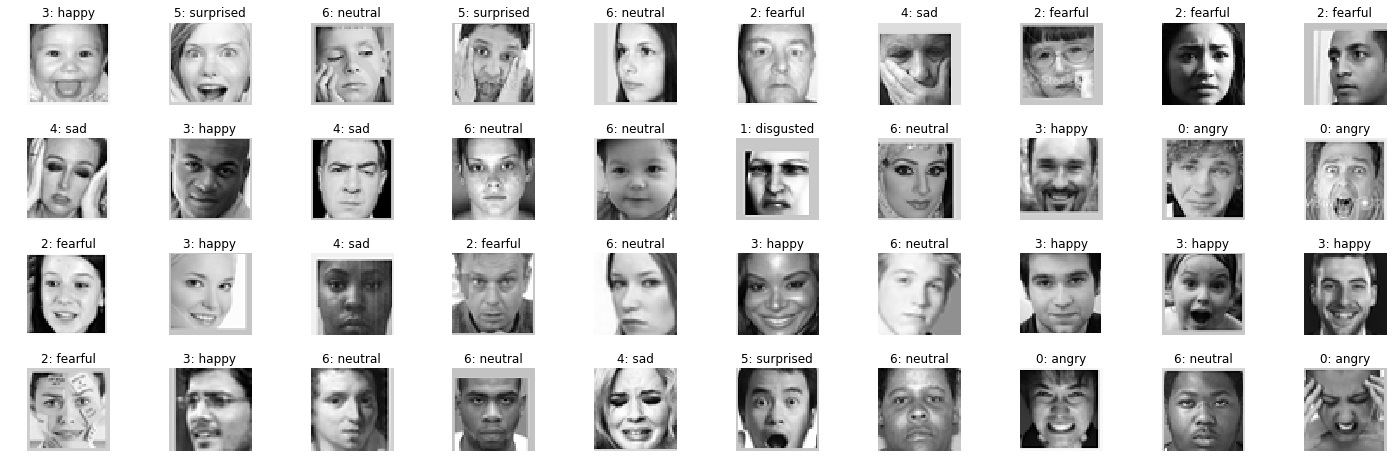

In [4]:
test_x = ds._images_test
test_y = ds._labels_test
plot20images(test_x, test_y)

## Show class frequency in train set

[1467  249 1404 3226 1265 1393 2210]


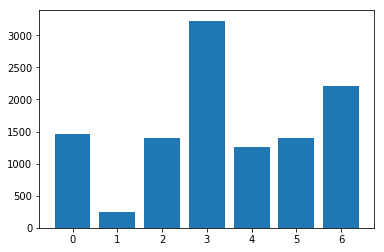

In [5]:
classes = np.argmax(train_y,axis=1)

unique_classes, unique_counts = np.unique(classes, return_counts=True)

print(unique_counts)
plt.bar(unique_classes,unique_counts)
plt.show()

[323  53 372 817 349 310 580]


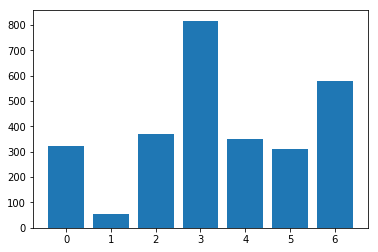

In [6]:
classes = np.argmax(test_y,axis=1)

unique_classes, unique_counts = np.unique(classes, return_counts=True)

print(unique_counts)
plt.bar(unique_classes,unique_counts)
plt.show()

# Remove Disgusted

In [7]:
def remove_class_label(label, images, labels):
    idx_to_remove=[]
    
    if images.shape[0] != labels.shape[0]:
        raise AssertionError('images and labels have not the same length')

    classes = np.argmax(labels,axis=1)
    for idx, l in enumerate(classes):
        if l == label:
            idx_to_remove.append(idx)
        if l > label:
            classes[idx] = l - 1
    
    print(len(idx_to_remove), ' indices removed')
    
    # remove the indices form the classes list,
    # and transform it into an one hot encodet array
    classes = np.delete(classes, idx_to_remove)
    unique_classes = np.unique(classes)
    labels = np.zeros((classes.shape[0], len(unique_classes)))
    labels[np.arange(classes.shape[0]), classes] = 1
    
    images = np.delete(images, idx_to_remove,axis=0)
    return images, labels

In [8]:
from constants import *
from os.path import join

images = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_IMAGES_FILENAME))
images = images.reshape([-1, SIZE_FACE, SIZE_FACE, 1])
labels = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_LABELS_FILENAME)).reshape([-1, len(EMOTIONS)])

[1790  302 1776 4043 1614 1703 2790]


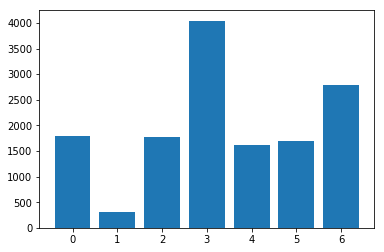

In [9]:
classes = np.argmax(labels,axis=1)

unique_classes, unique_counts = np.unique(classes, return_counts=True)

print(unique_counts)
plt.bar(unique_classes,unique_counts)
plt.show()

In [10]:
print('images.shape:',images.shape,'labels.shape:',labels.shape)

new_images, new_labels = remove_class_label(1, images, labels)

print('new_images.shape:',new_images.shape,'new_labels.shape:',new_labels.shape)

_, unique_counts = np.unique(np.argmax(new_labels, axis=1), return_counts=True)
print('New Class Frequency:', unique_counts)

np.save('./data/data_images_without_disgusted_class.npy',new_images)
np.save('./data/data_labels_without_disgusted_class.npy',new_labels)

images.shape: (14018, 48, 48, 1) labels.shape: (14018, 7)
302  indices removed
new_images.shape: (13716, 48, 48, 1) new_labels.shape: (13716, 6)
New Class Frequency: [1790 1776 4043 1614 1703 2790]


## TEST NEW FILES

In [17]:
from constants import *
from os.path import join

images = np.load(join('data', 'data_images.npy'))
images = images.reshape([-1, SIZE_FACE, SIZE_FACE, 1])
labels = np.load(join('data', 'data_labels.npy')).reshape([-1,7])

print('images.shape:',images.shape,'labels.shape:',labels.shape)

images.shape: (14018, 48, 48, 1) labels.shape: (14018, 7)


[[ 0.78431373  0.77647059  0.77647059 ...,  0.77647059  0.77254902
   0.78431373]
 [ 0.77647059  0.23137255  0.29411765 ...,  0.14901961  0.10980392
   0.77254902]
 [ 0.77647059  0.22745098  0.22745098 ...,  0.21176471  0.14901961
   0.77647059]
 ..., 
 [ 0.77647059  0.28627451  0.31764706 ...,  0.27843137  0.14901961
   0.77254902]
 [ 0.77647059  0.25882353  0.26666667 ...,  0.41176471  0.28235294
   0.77647059]
 [ 0.78431373  0.77647059  0.77647059 ...,  0.78039216  0.77647059
   0.78431373]]
